 Libraries loaded successfully!

 Downloaded 763 days of data

 First 5 days:
                 Price
Date                  
2022-01-03  178.270279
2022-01-04  176.007767
2022-01-05  171.325989
2022-01-06  168.465988
2022-01-07  168.632462

 Last 5 days:
                 Price
Date                  
2025-01-10  235.783615
2025-01-13  233.344635
2025-01-14  232.229691
2025-01-15  236.799011
2025-01-16  227.232285


/var/folders/wx/rftvk05x6xb23ctphhsvgf580000gn/T/ipykernel_29755/1829848004.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start="2022-01-01", end="2025-01-17", progress=False)


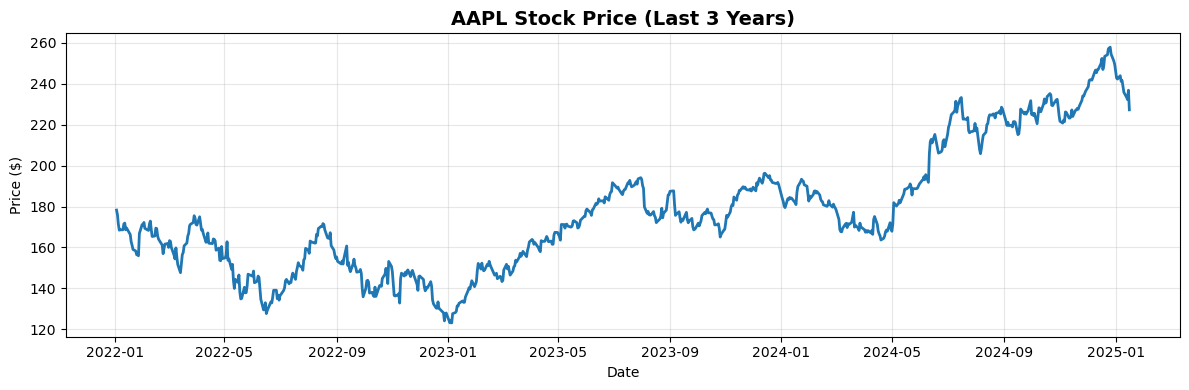


 Tip: Price went from $178.27 to $227.23


In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

%matplotlib inline

print(" Libraries loaded successfully!\n")

symbol = "AAPL"
print(f"  Downloading {symbol} stock data...")

data = yf.download(symbol, start="2022-01-01", end="2025-01-17", progress=False)

df = data[['Close']].copy()
df.columns = ['Price']  

print(f" Downloaded {len(df)} days of data\n")
print(" First 5 days:")
print(df.head())
print("\n Last 5 days:")
print(df.tail())

# Quick plot
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['Price'], linewidth=2)
plt.title(f'{symbol} Stock Price (Last 3 Years)', fontsize=14, fontweight='bold')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n Tip: Price went from ${df['Price'].iloc[0]:.2f} to ${df['Price'].iloc[-1]:.2f}")

 DAILY RETURNS EXPLAINED:
Each number = how much price changed from yesterday
  +0.02 = price went UP 2%
  -0.03 = price went DOWN 3%

 First 10 daily returns:
Date
2022-01-04   -0.012773
2022-01-05   -0.026960
2022-01-06   -0.016834
2022-01-07    0.000988
2022-01-10    0.000116
2022-01-11    0.016644
2022-01-12    0.002567
2022-01-13   -0.019211
2022-01-14    0.005098
2022-01-18   -0.019075
Name: Daily_Return, dtype: float64

 Statistics:
count    762.000000
mean       0.000318
std        0.017071
min       -0.060472
25%       -0.008600
50%        0.000887
75%        0.009573
max        0.085236
Name: Daily_Return, dtype: float64


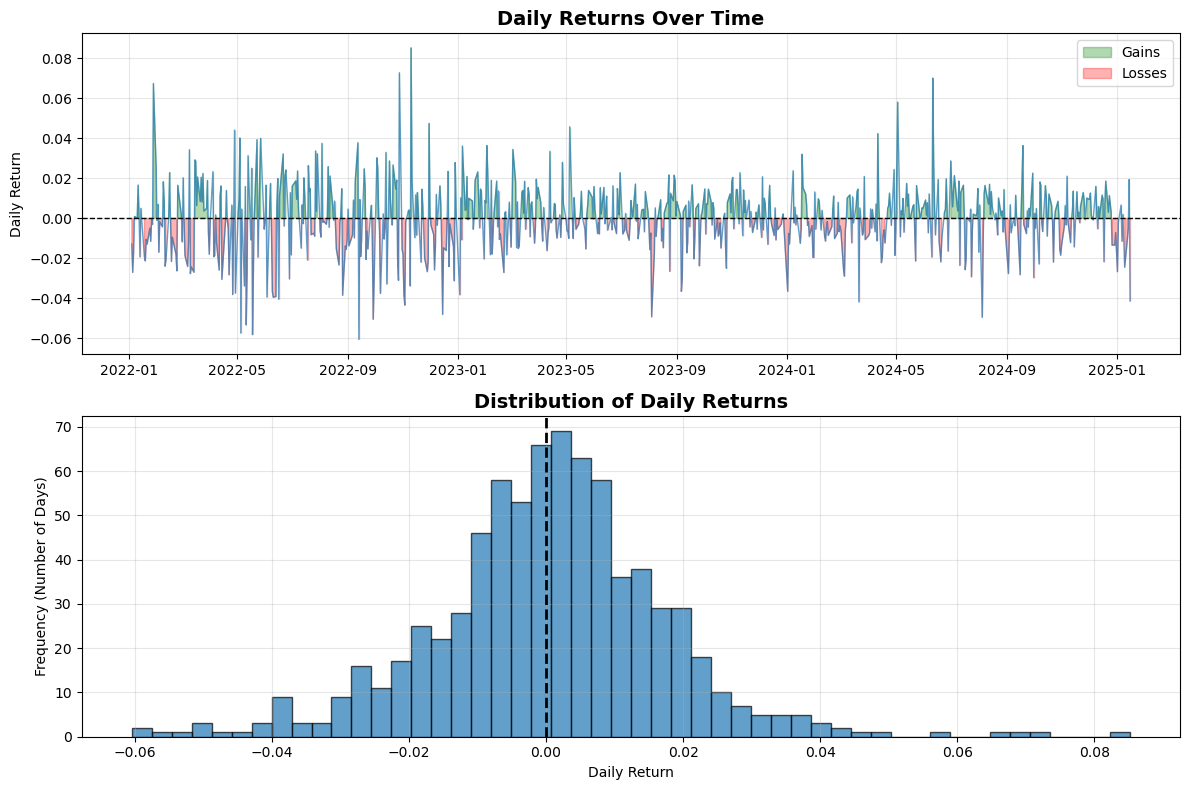


 Insight: Most days are near 0 (small changes)
   Average daily return: 0.0003 (0.03%)
   Biggest gain: 0.0852 (8.52%)
   Biggest loss: -0.0605 (-6.05%)


In [14]:
df['Daily_Return'] = np.log(df['Price'] / df['Price'].shift(1))

# Remove first row (it's NaN because no previous day)
df = df.dropna()

print(" DAILY RETURNS EXPLAINED:")
print("=" * 50)
print("Each number = how much price changed from yesterday")
print("  +0.02 = price went UP 2%")
print("  -0.03 = price went DOWN 3%")
print("=" * 50)
print("\n First 10 daily returns:")
print(df['Daily_Return'].head(10))

print("\n Statistics:")
print(df['Daily_Return'].describe())

# Visualize returns
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Daily returns over time
ax1.plot(df.index, df['Daily_Return'], linewidth=1, alpha=0.7)
ax1.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax1.set_title('Daily Returns Over Time', fontsize=14, fontweight='bold')
ax1.set_ylabel('Daily Return')
ax1.grid(True, alpha=0.3)
ax1.fill_between(df.index, df['Daily_Return'], 0, 
                  where=(df['Daily_Return'] > 0), alpha=0.3, color='green', label='Gains')
ax1.fill_between(df.index, df['Daily_Return'], 0, 
                  where=(df['Daily_Return'] < 0), alpha=0.3, color='red', label='Losses')
ax1.legend()

# Distribution (histogram)
ax2.hist(df['Daily_Return'], bins=50, edgecolor='black', alpha=0.7)
ax2.axvline(x=0, color='black', linestyle='--', linewidth=2)
ax2.set_title('Distribution of Daily Returns', fontsize=14, fontweight='bold')
ax2.set_xlabel('Daily Return')
ax2.set_ylabel('Frequency (Number of Days)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n Insight: Most days are near 0 (small changes)")
print(f"   Average daily return: {df['Daily_Return'].mean():.4f} ({df['Daily_Return'].mean()*100:.2f}%)")
print(f"   Biggest gain: {df['Daily_Return'].max():.4f} ({df['Daily_Return'].max()*100:.2f}%)")
print(f"   Biggest loss: {df['Daily_Return'].min():.4f} ({df['Daily_Return'].min()*100:.2f}%)")

 VOLATILITY CALCULATION

  Daily Volatility: 0.017071
    In English: On average, price moves 1.71% per day

  Annual Volatility: 0.2710 = 27.10%
    In English: Over a year, price typically varies by 27.10%

 WHAT DOES THIS MEAN?
MODERATE RISK 
Normal stock volatility

For context:
  • Low vol stocks:  10-15% (utilities, consumer staples)
  • Medium vol:      15-30% (most large companies)
  • High vol:        30%+   (tech startups, crypto)

  AAPL is at 27.1%


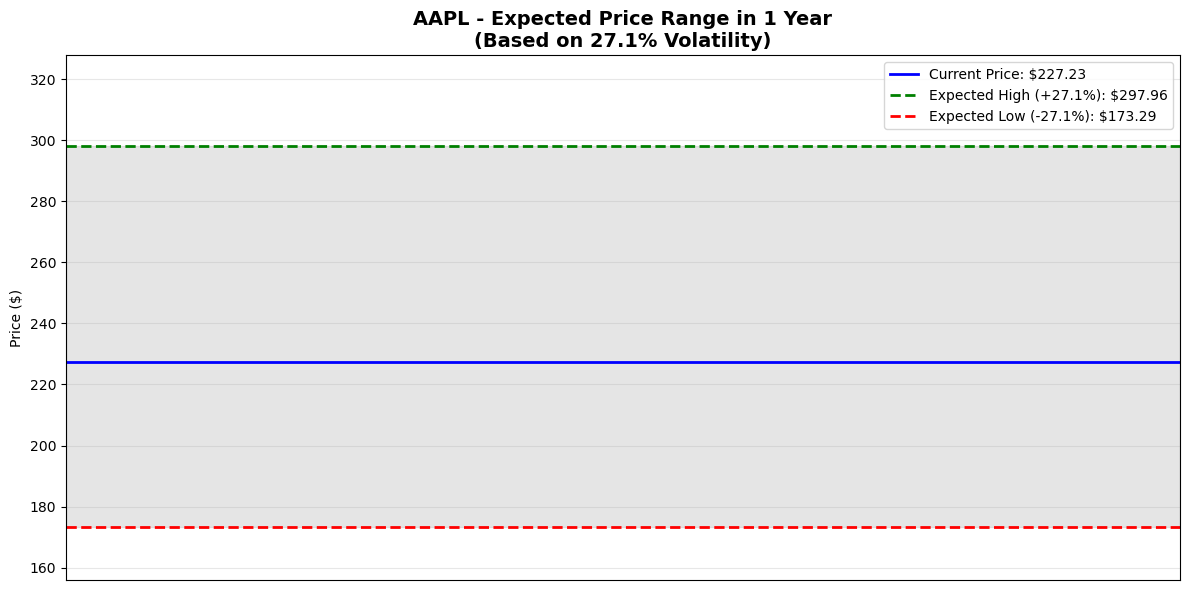


 Interpretation:
   There's a 68% chance AAPL will be between
   $173.29 and $297.96 in one year
   (if volatility stays the same)


In [16]:
print(" VOLATILITY CALCULATION")
print("=" * 60)

daily_volatility = df['Daily_Return'].std()
print(f"\n  Daily Volatility: {daily_volatility:.6f}")
print(f"    In English: On average, price moves {daily_volatility*100:.2f}% per day")

annual_volatility = daily_volatility * np.sqrt(252)

print(f"\n  Annual Volatility: {annual_volatility:.4f} = {annual_volatility*100:.2f}%")
print(f"    In English: Over a year, price typically varies by {annual_volatility*100:.2f}%")

print("\n" + "=" * 60)
print(" WHAT DOES THIS MEAN?")
print("=" * 60)
if annual_volatility < 0.15:
    risk_level = "LOW RISK "
    desc = "Very stable stock"
elif annual_volatility < 0.30:
    risk_level = "MODERATE RISK "
    desc = "Normal stock volatility"
else:
    risk_level = "HIGH RISK "
    desc = "Very jumpy/risky stock"

print(f"{risk_level}")
print(f"{desc}")
print(f"\nFor context:")
print(f"  • Low vol stocks:  10-15% (utilities, consumer staples)")
print(f"  • Medium vol:      15-30% (most large companies)")
print(f"  • High vol:        30%+   (tech startups, crypto)")
print(f"\n  {symbol} is at {annual_volatility*100:.1f}%")

fig, ax = plt.subplots(figsize=(12, 6))

current_price = df['Price'].iloc[-1]
dates_future = pd.date_range(start=df.index[-1], periods=252, freq='D')

upper_bound = current_price * np.exp(annual_volatility)
lower_bound = current_price * np.exp(-annual_volatility)

ax.axhline(y=current_price, color='blue', linewidth=2, label=f'Current Price: ${current_price:.2f}')
ax.axhline(y=upper_bound, color='green', linestyle='--', linewidth=2, 
           label=f'Expected High (+{annual_volatility*100:.1f}%): ${upper_bound:.2f}')
ax.axhline(y=lower_bound, color='red', linestyle='--', linewidth=2,
           label=f'Expected Low (-{annual_volatility*100:.1f}%): ${lower_bound:.2f}')
ax.fill_between([0, 1], lower_bound, upper_bound, alpha=0.2, color='gray')

ax.set_xlim([0, 1])
ax.set_ylim([lower_bound * 0.9, upper_bound * 1.1])
ax.set_title(f'{symbol} - Expected Price Range in 1 Year\n(Based on {annual_volatility*100:.1f}% Volatility)', 
             fontsize=14, fontweight='bold')
ax.set_ylabel('Price ($)')
ax.legend(loc='best', fontsize=10)
ax.set_xticks([])
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n Interpretation:")
print(f"   There's a 68% chance {symbol} will be between")
print(f"   ${lower_bound:.2f} and ${upper_bound:.2f} in one year")
print(f"   (if volatility stays the same)")

 ROLLING WINDOW VOLATILITY
Instead of ONE volatility for all time, calculate it
using different time windows:
  • 20 days  = Short-term (1 month)
  • 60 days  = Medium-term (3 months)
  • 120 days = Long-term (6 months)

 Calculated 20-day rolling volatility
 Calculated 60-day rolling volatility
 Calculated 120-day rolling volatility

 Latest volatility readings:
------------------------------------------------------------
Timeframe       Volatility      Interpretation
------------------------------------------------------------
20-day           25.13%            Recent trend
60-day           19.55%            Medium-term average
120-day           20.87%            Long-term baseline


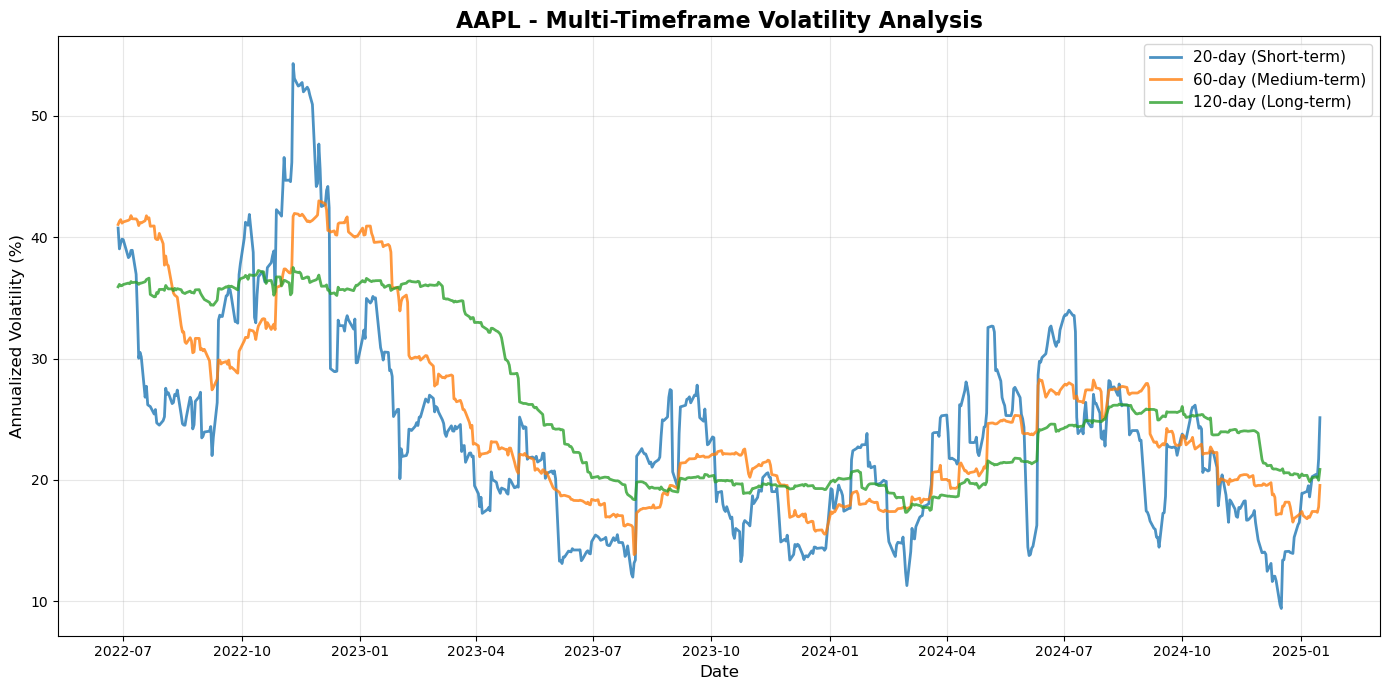


 KEY INSIGHTS:
 ELEVATED RISK: Recent volatility (25.1%) is
   20.4% HIGHER than long-term average (20.9%)
   → Market is getting MORE volatile recently

 Highest volatility period:
   Date: 2022-11-10
   Volatility: 54.3%


In [20]:
print(" ROLLING WINDOW VOLATILITY")
print("=" * 60)
print("Instead of ONE volatility for all time, calculate it")
print("using different time windows:")
print("  • 20 days  = Short-term (1 month)")
print("  • 60 days  = Medium-term (3 months)")
print("  • 120 days = Long-term (6 months)")
print("=" * 60 + "\n")

windows = [20, 60, 120]

for window in windows:
    df[f'Vol_{window}d'] = df['Daily_Return'].rolling(window=window).std() * np.sqrt(252)
    print(f" Calculated {window}-day rolling volatility")

df_clean = df.dropna()

print(f"\n Latest volatility readings:")
print("-" * 60)
latest = df_clean.iloc[-1]
print(f"{'Timeframe':<15} {'Volatility':<15} {'Interpretation'}")
print("-" * 60)
for window in windows:
    vol = latest[f'Vol_{window}d']
    if window == 20:
        interp = "Recent trend"
    elif window == 60:
        interp = "Medium-term average"
    else:
        interp = "Long-term baseline"
    print(f"{window}-day {'':<8} {vol*100:>6.2f}% {'':<10} {interp}")

plt.figure(figsize=(14, 7))

plt.plot(df_clean.index, df_clean['Vol_20d'] * 100, 
         label='20-day (Short-term)', linewidth=2, alpha=0.8)
plt.plot(df_clean.index, df_clean['Vol_60d'] * 100, 
         label='60-day (Medium-term)', linewidth=2, alpha=0.8)
plt.plot(df_clean.index, df_clean['Vol_120d'] * 100, 
         label='120-day (Long-term)', linewidth=2, alpha=0.8)

plt.title(f'{symbol} - Multi-Timeframe Volatility Analysis', 
          fontsize=16, fontweight='bold')
plt.ylabel('Annualized Volatility (%)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend(loc='best', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print(" KEY INSIGHTS:")
print("=" * 60)

short_vol = latest['Vol_20d']
long_vol = latest['Vol_120d']
diff = ((short_vol / long_vol) - 1) * 100

if diff > 10:
    print(f" ELEVATED RISK: Recent volatility ({short_vol*100:.1f}%) is")
    print(f"   {diff:.1f}% HIGHER than long-term average ({long_vol*100:.1f}%)")
    print(f"   → Market is getting MORE volatile recently")
elif diff < -10:
    print(f" CALMING DOWN: Recent volatility ({short_vol*100:.1f}%) is")
    print(f"   {abs(diff):.1f}% LOWER than long-term average ({long_vol*100:.1f}%)")
    print(f"   → Market is getting LESS volatile recently")
else:
    print(f"  STABLE: Recent volatility ({short_vol*100:.1f}%) is similar")
    print(f"   to long-term average ({long_vol*100:.1f}%)")
    print(f"   → Volatility is consistent")

max_vol_date = df_clean['Vol_20d'].idxmax()
max_vol_value = df_clean['Vol_20d'].max()
print(f"\n Highest volatility period:")
print(f"   Date: {max_vol_date.date()}")
print(f"   Volatility: {max_vol_value*100:.1f}%")


 EWMA - EXPONENTIALLY WEIGHTED MOVING AVERAGE
Problem with rolling windows: They treat all days equally
Solution: Give MORE weight to RECENT days

Example: A market crash yesterday matters MORE than
         a quiet day 50 days ago

 Calculated EWMA volatility (alpha=0.06)



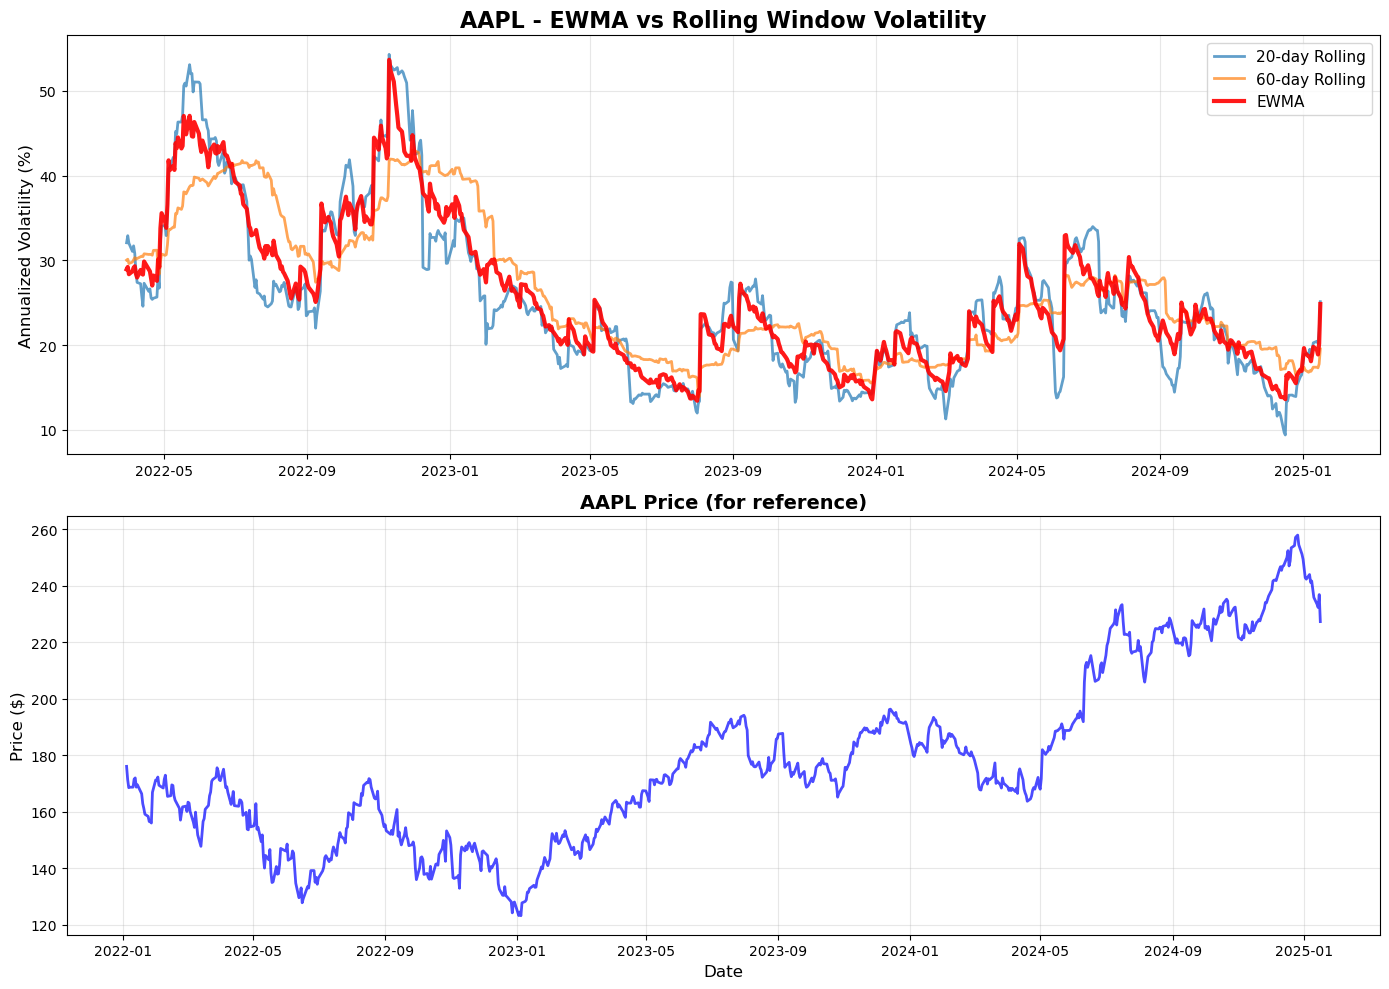


 COMPARISON: How different are these methods?

Method               Current Vol     Responsiveness
------------------------------------------------------------
20-day Rolling        25.13%            Fast (but choppy)
60-day Rolling        19.55%            Balanced
EWMA                  24.85%            Reactive to shocks

 BIGGEST SHOCK IN DATASET:
   Date: 2022-11-10
   Size: 8.52% daily move

   Response to shock (5 days after):
   20-day: 46.6% → 52.7% (+6.2%)
   EWMA:   45.9% → 47.1% (+1.2%)

    Rolling window caught up eventually

 WHEN TO USE EACH METHOD:
 20-day:  Day trading, short-term options pricing
 60-day:  Swing trading, quarterly risk reports
 120-day: Long-term investing, strategic allocation
 EWMA:    Risk management, fast response to crises


In [24]:
print(" EWMA - EXPONENTIALLY WEIGHTED MOVING AVERAGE")
print("=" * 60)
print("Problem with rolling windows: They treat all days equally")
print("Solution: Give MORE weight to RECENT days")
print("")
print("Example: A market crash yesterday matters MORE than")
print("         a quiet day 50 days ago")
print("=" * 60 + "\n")

df['Vol_EWMA'] = df['Daily_Return'].ewm(alpha=0.06, adjust=False).std() * np.sqrt(252)

print(" Calculated EWMA volatility (alpha=0.06)\n")

comparison = df[['Vol_20d', 'Vol_60d', 'Vol_EWMA']].dropna()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

ax1.plot(comparison.index, comparison['Vol_20d'] * 100, 
         label='20-day Rolling', linewidth=2, alpha=0.7)
ax1.plot(comparison.index, comparison['Vol_60d'] * 100, 
         label='60-day Rolling', linewidth=2, alpha=0.7)
ax1.plot(comparison.index, comparison['Vol_EWMA'] * 100, 
         label='EWMA', linewidth=3, alpha=0.9, color='red')
ax1.set_title(f'{symbol} - EWMA vs Rolling Window Volatility', 
              fontsize=16, fontweight='bold')
ax1.set_ylabel('Annualized Volatility (%)', fontsize=12)
ax1.legend(loc='best', fontsize=11)
ax1.grid(True, alpha=0.3)

ax2.plot(df.index, df['Price'], linewidth=2, color='blue', alpha=0.7)
ax2.set_title(f'{symbol} Price (for reference)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Price ($)', fontsize=12)
ax2.set_xlabel('Date', fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print(" COMPARISON: How different are these methods?")
print("=" * 60)

latest = comparison.iloc[-1]
print(f"\n{'Method':<20} {'Current Vol':<15} {'Responsiveness'}")
print("-" * 60)
print(f"{'20-day Rolling':<20} {latest['Vol_20d']*100:>6.2f}% {'':<10} Fast (but choppy)")
print(f"{'60-day Rolling':<20} {latest['Vol_60d']*100:>6.2f}% {'':<10} Balanced")
print(f"{'EWMA':<20} {latest['Vol_EWMA']*100:>6.2f}% {'':<10} Reactive to shocks")

returns_abs = df['Daily_Return'].abs()
shock_date = returns_abs.idxmax()
shock_size = returns_abs.max()

print(f"\n BIGGEST SHOCK IN DATASET:")
print(f"   Date: {shock_date.date()}")
print(f"   Size: {shock_size*100:.2f}% daily move")

try:
    shock_idx = df.index.get_loc(shock_date)
    
    if shock_idx > 5 and shock_idx < len(df) - 5:
        before_20d = df['Vol_20d'].iloc[shock_idx - 5] * 100
        after_20d = df['Vol_20d'].iloc[shock_idx + 5] * 100
        
        before_ewma = df['Vol_EWMA'].iloc[shock_idx - 5] * 100
        after_ewma = df['Vol_EWMA'].iloc[shock_idx + 5] * 100
        
        print(f"\n   Response to shock (5 days after):")
        print(f"   20-day: {before_20d:.1f}% → {after_20d:.1f}% (+{after_20d-before_20d:.1f}%)")
        print(f"   EWMA:   {before_ewma:.1f}% → {after_ewma:.1f}% (+{after_ewma-before_ewma:.1f}%)")
        
        if (after_ewma - before_ewma) > (after_20d - before_20d):
            print(f"\n    EWMA reacted FASTER to the shock!")
        else:
            print(f"\n    Rolling window caught up eventually")
except:
    print("   (Not enough data around shock to compare)")

print("\n" + "=" * 60)
print(" WHEN TO USE EACH METHOD:")
print("=" * 60)
print(" 20-day:  Day trading, short-term options pricing")
print(" 60-day:  Swing trading, quarterly risk reports")
print(" 120-day: Long-term investing, strategic allocation")
print(" EWMA:    Risk management, fast response to crises")
print("=" * 60)

 MACRO EVENT ANALYSIS
Question: Does volatility spike around big economic events?
We'll test: Federal Reserve (FOMC) meetings

Analyzing 8 FOMC meetings from 2024

Event Date       Vol Before  Vol After   Change
------------------------------------------------------------
2024-01-31    23.83%     14.02%     -41.2%
2024-03-20    18.87%     27.61%     +46.3%
2024-05-01    24.36%     25.40%      +4.3%
2024-06-12    28.64%     25.15%     -12.2%
2024-07-31    23.46%     24.07%      +2.6%
2024-09-18    17.31%     24.39%     +40.9%
2024-11-07    16.51%     13.87%     -16.0%
2024-12-18     9.41%     25.21%    +168.0%

 AGGREGATE STATISTICS:
Average volatility BEFORE events: 20.30%
Average volatility AFTER events:  22.47%
Average change: +24.1%

 CONFIRMED: Volatility increases ~24.1% after FOMC meetings!


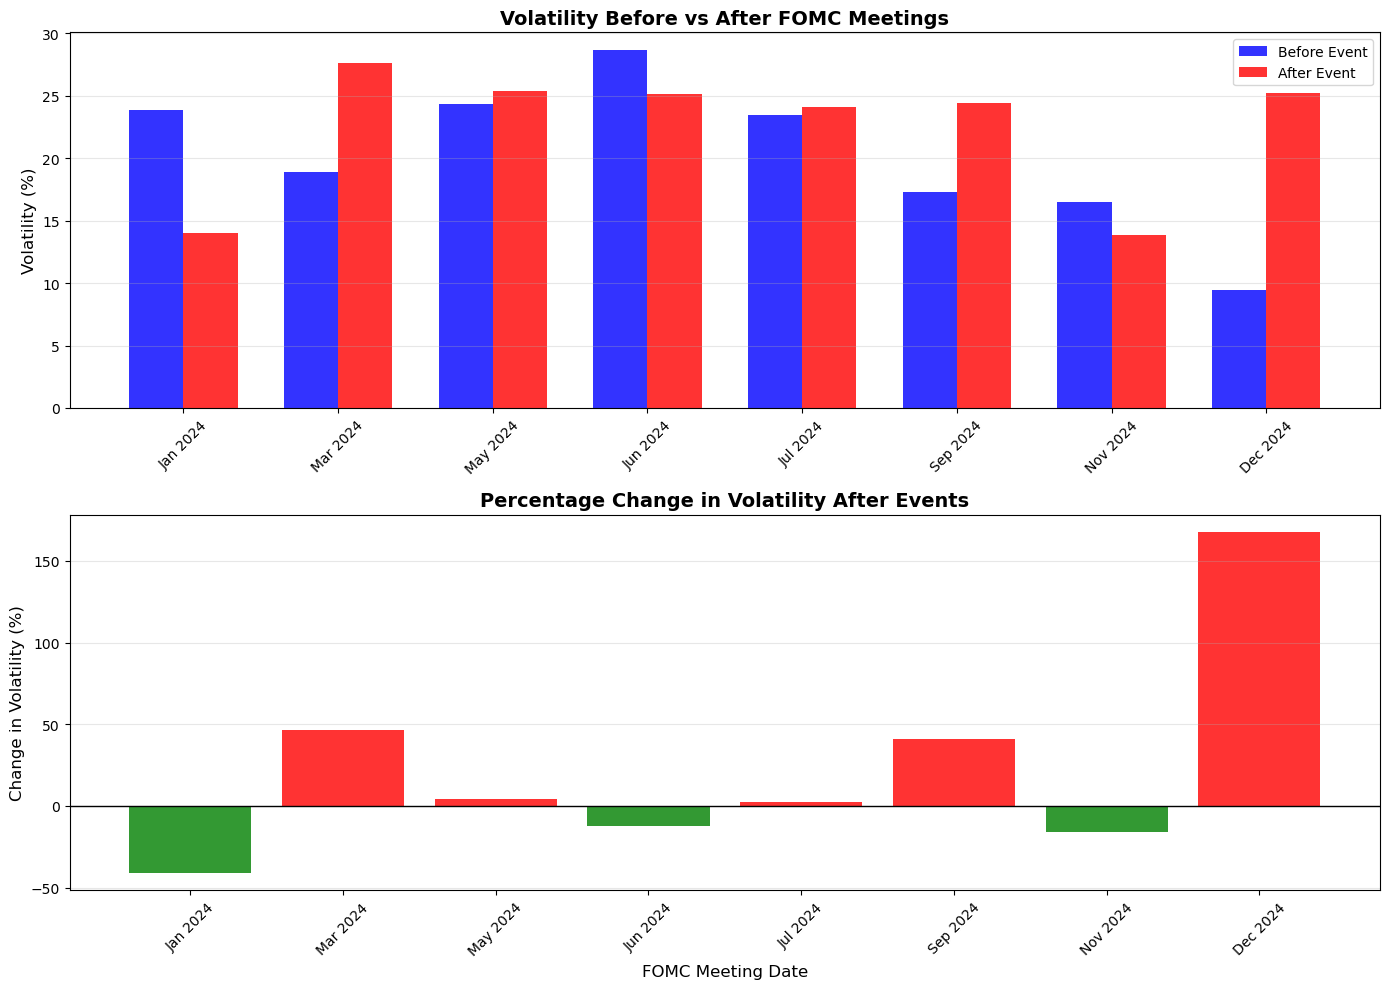


 MOST IMPACTFUL EVENT:
   Date: 2024-12-18
   Volatility change: +168.0%
   9.4% → 25.2%

 PRACTICAL USE:
 Options traders: Expect higher premiums near FOMC
 Risk managers: Increase hedges before major events
 Long-term investors: Volatility spikes = buying opportunity


In [26]:
print(" MACRO EVENT ANALYSIS")
print("=" * 60)
print("Question: Does volatility spike around big economic events?")
print("We'll test: Federal Reserve (FOMC) meetings")
print("=" * 60 + "\n")

fomc_dates = [
    '2024-01-31',  
    '2024-03-20',  
    '2024-05-01',  
    '2024-06-12',  
    '2024-07-31',  
    '2024-09-18',  
    '2024-11-07',  
    '2024-12-18',  
]

fomc_dates = pd.to_datetime(fomc_dates)

print(f"Analyzing {len(fomc_dates)} FOMC meetings from 2024\n")

def event_volatility(df, event_date, window=20):
    """
    Calculate volatility BEFORE and AFTER an event
    window: how many days before/after to measure
    """
    # Find closest trading day to event
    try:
        event_idx = df.index.get_indexer([event_date], method='nearest')[0]
        event_date_actual = df.index[event_idx]
        
        # 20 days before
        start_before = max(0, event_idx - window)
        end_before = event_idx
        
        # 20 days after
        start_after = event_idx
        end_after = min(len(df), event_idx + window)
        
        # Calculate volatility for each period
        vol_before = df['Daily_Return'].iloc[start_before:end_before].std() * np.sqrt(252)
        vol_after = df['Daily_Return'].iloc[start_after:end_after].std() * np.sqrt(252)
        
        return {
            'date': event_date_actual,
            'vol_before': vol_before,
            'vol_after': vol_after,
            'change': vol_after - vol_before,
            'pct_change': ((vol_after / vol_before) - 1) * 100 if vol_before > 0 else 0
        }
    except:
        return None

# Analyze all FOMC meetings
results = []
print("Event Date       Vol Before  Vol After   Change")
print("-" * 60)

for date in fomc_dates:
    result = event_volatility(df, date, window=20)
    if result:
        results.append(result)
        print(f"{result['date'].date()}   {result['vol_before']*100:>6.2f}%    {result['vol_after']*100:>6.2f}%    {result['pct_change']:>+6.1f}%")

# Convert to DataFrame for analysis
event_df = pd.DataFrame(results)

print("\n" + "=" * 60)
print(" AGGREGATE STATISTICS:")
print("=" * 60)

avg_before = event_df['vol_before'].mean() * 100
avg_after = event_df['vol_after'].mean() * 100
avg_increase = event_df['pct_change'].mean()

print(f"Average volatility BEFORE events: {avg_before:.2f}%")
print(f"Average volatility AFTER events:  {avg_after:.2f}%")
print(f"Average change: {avg_increase:+.1f}%")

if avg_increase > 5:
    print(f"\n CONFIRMED: Volatility increases ~{avg_increase:.1f}% after FOMC meetings!")
elif avg_increase < -5:
    print(f"\n INTERESTING: Volatility actually DECREASES ~{abs(avg_increase):.1f}% after events")
    print("   (Markets might be relieved after uncertainty resolves)")
else:
    print(f"\n  NO CLEAR PATTERN: Volatility change is minimal ({avg_increase:.1f}%)")

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Before vs After for each event
x = range(len(event_df))
width = 0.35

ax1.bar([i - width/2 for i in x], event_df['vol_before'] * 100, 
        width, label='Before Event', alpha=0.8, color='blue')
ax1.bar([i + width/2 for i in x], event_df['vol_after'] * 100, 
        width, label='After Event', alpha=0.8, color='red')

ax1.set_ylabel('Volatility (%)', fontsize=12)
ax1.set_title('Volatility Before vs After FOMC Meetings', 
              fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels([d.strftime('%b %Y') for d in event_df['date']], rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Percentage change
colors = ['green' if x < 0 else 'red' for x in event_df['pct_change']]
ax2.bar(x, event_df['pct_change'], alpha=0.8, color=colors)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax2.set_ylabel('Change in Volatility (%)', fontsize=12)
ax2.set_xlabel('FOMC Meeting Date', fontsize=12)
ax2.set_title('Percentage Change in Volatility After Events', 
              fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels([d.strftime('%b %Y') for d in event_df['date']], rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Find most impactful event
max_change_idx = event_df['pct_change'].abs().idxmax()
max_event = event_df.iloc[max_change_idx]

print(f"\n MOST IMPACTFUL EVENT:")
print(f"   Date: {max_event['date'].date()}")
print(f"   Volatility change: {max_event['pct_change']:+.1f}%")
print(f"   {max_event['vol_before']*100:.1f}% → {max_event['vol_after']*100:.1f}%")

print("\n" + "=" * 60)
print(" PRACTICAL USE:")
print("=" * 60)
print(" Options traders: Expect higher premiums near FOMC")
print(" Risk managers: Increase hedges before major events")
print(" Long-term investors: Volatility spikes = buying opportunity")
print("=" * 60)

In [28]:
# Cell 7: Professional Summary Dashboard

print("=" * 70)
print(" " * 15 + " VOLATILITY ANALYSIS REPORT")
print("=" * 70)

# Header
print(f"\nStock: {symbol}")
print(f"Analysis Period: {df.index[0].date()} to {df.index[-1].date()}")
print(f"Total Trading Days: {len(df)}")
print(f"Report Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

# Section 1: Current Volatility Snapshot
print("\n" + "─" * 70)
print("1. CURRENT VOLATILITY SNAPSHOT")
print("─" * 70)

latest = df.iloc[-1]
print(f"\n{'Metric':<25} {'Value':<15} {'Interpretation'}")
print("-" * 70)

# Historical volatility
hist_vol = df['Daily_Return'].std() * np.sqrt(252)
print(f"{'Historical (Full Period)':<25} {hist_vol*100:>6.2f}% {'':<10} Baseline reference")

# Rolling volatilities
for window in [20, 60, 120]:
    col_name = f'Vol_{window}d'
    if col_name in df.columns:
        vol = latest[col_name]
        if window == 20:
            interp = "Current trend"
        elif window == 60:
            interp = "Medium-term"
        else:
            interp = "Long-term"
        print(f"{f'{window}-day Rolling':<25} {vol*100:>6.2f}% {'':<10} {interp}")

# EWMA
if 'Vol_EWMA' in df.columns:
    ewma_vol = latest['Vol_EWMA']
    print(f"{'EWMA (Shock-weighted)':<25} {ewma_vol*100:>6.2f}% {'':<10} Crisis-sensitive")

# Section 2: Volatility Regime
print("\n" + "─" * 70)
print("2. VOLATILITY REGIME ANALYSIS")
print("─" * 70)

current_vol = latest['Vol_60d'] * 100 if 'Vol_60d' in df.columns else hist_vol * 100
historical_median = (df['Vol_60d'].median() * 100 if 'Vol_60d' in df.columns 
                     else hist_vol * 100)

print(f"\nCurrent 60-day volatility: {current_vol:.2f}%")
print(f"Historical median:         {historical_median:.2f}%")

if current_vol > historical_median * 1.3:
    regime = " HIGH VOLATILITY REGIME"
    desc = "Elevated risk. Consider reducing position sizes."
elif current_vol < historical_median * 0.7:
    regime = " LOW VOLATILITY REGIME"
    desc = "Calm markets. Potential for volatility selling strategies."
else:
    regime = " NORMAL VOLATILITY REGIME"
    desc = "Typical market conditions."

print(f"\n{regime}")
print(f"{desc}")

# Section 3: Trend Analysis
print("\n" + "─" * 70)
print("3. VOLATILITY TREND")
print("─" * 70)

if 'Vol_20d' in df.columns and 'Vol_120d' in df.columns:
    short_term = latest['Vol_20d']
    long_term = latest['Vol_120d']
    trend_pct = ((short_term / long_term) - 1) * 100
    
    print(f"\nShort-term (20d):  {short_term*100:.2f}%")
    print(f"Long-term (120d):  {long_term*100:.2f}%")
    print(f"Difference:        {trend_pct:+.1f}%")
    
    if trend_pct > 15:
        trend = " RISING VOLATILITY"
        advice = "Volatility is accelerating. Monitor for mean reversion."
    elif trend_pct < -15:
        trend = " FALLING VOLATILITY"
        advice = "Volatility is compressing. Potential breakout ahead."
    else:
        trend = "  STABLE VOLATILITY"
        advice = "Volatility is consistent across timeframes."
    
    print(f"\n{trend}")
    print(f"{advice}")

print("\n" + "─" * 70)
print("4. RISK METRICS")
print("─" * 70)

current_price = latest['Price']
daily_vol = df['Daily_Return'].std()

print(f"\nCurrent Price: ${current_price:.2f}")
print(f"\nExpected Daily Move (1 std dev):")
print(f"  ± ${current_price * daily_vol:.2f} ({daily_vol*100:.2f}%)")

print(f"\nExpected Annual Range (1 std dev, 68% probability):")
upper_1yr = current_price * np.exp(current_vol/100)
lower_1yr = current_price * np.exp(-current_vol/100)
print(f"  High: ${upper_1yr:.2f}")
print(f"  Low:  ${lower_1yr:.2f}")
print(f"  Range: ${upper_1yr - lower_1yr:.2f}")

print("\n" + "─" * 70)
print("5. HISTORICAL EXTREMES")
print("─" * 70)

if 'Vol_20d' in df.columns:
    max_vol_date = df['Vol_20d'].idxmax()
    max_vol = df.loc[max_vol_date, 'Vol_20d'] * 100
    print(f"\nHighest Volatility:")
    print(f"  Date: {max_vol_date.date()}")
    print(f"  Volatility: {max_vol:.2f}%")

if 'Vol_20d' in df.columns:
    min_vol_date = df['Vol_20d'].idxmin()
    min_vol = df.loc[min_vol_date, 'Vol_20d'] * 100
    print(f"\nLowest Volatility:")
    print(f"  Date: {min_vol_date.date()}")
    print(f"  Volatility: {min_vol:.2f}%")

max_return_date = df['Daily_Return'].abs().idxmax()
max_return = df.loc[max_return_date, 'Daily_Return'] * 100
print(f"\nBiggest Single-Day Move:")
print(f"  Date: {max_return_date.date()}")
print(f"  Return: {max_return:+.2f}%")

print("\n" + "=" * 70)
print(" METHODOLOGY NOTES:")
print("=" * 70)
print(" Log returns used for better statistical properties")
print(" Annualization factor: √252 (trading days per year)")
print(" EWMA alpha: 0.06 (~30-day half-life)")
print(" Event windows: ±20 trading days around macro events")
print("=" * 70)


                VOLATILITY ANALYSIS REPORT

Stock: AAPL
Analysis Period: 2022-01-04 to 2025-01-16
Total Trading Days: 762
Report Generated: 2026-01-17 13:32:44

──────────────────────────────────────────────────────────────────────
1. CURRENT VOLATILITY SNAPSHOT
──────────────────────────────────────────────────────────────────────

Metric                    Value           Interpretation
----------------------------------------------------------------------
Historical (Full Period)   27.10%            Baseline reference
20-day Rolling             25.13%            Current trend
60-day Rolling             19.55%            Medium-term
120-day Rolling            20.87%            Long-term
EWMA (Shock-weighted)      24.85%            Crisis-sensitive

──────────────────────────────────────────────────────────────────────
2. VOLATILITY REGIME ANALYSIS
──────────────────────────────────────────────────────────────────────

Current 60-day volatility: 19.55%
Historical median:         23.12